## Desafio Senior -  Exercício Pesquisador 2020 

## Nome: Bruna Fortunato

### O PROBLEMA

A  quantidade  de  spams (mensagens  não  solicitadas) que  recebemos diariamente, não  para  de crescer.  Os  tipos de spam são diversos:  anúncios  de  produtos  /  web  sites,  esquemas  paraganhar dinheiro rápido, correntes, pornografia e etc.

O arquivo `sms_senior.csv` contém vários exemplos de mensagens comuns (4827 unidades) e
mensagens spams (747 unidades). As mensagens foram submetidas a uma etapa de mineração de
texto, com o objetivo de identificar as palavras mais frequentes na base de dados. Segue as
informações dos atributos do arquivo:   
* 1 coluna contendo a mensagem original (Full_Text);   
* 149 colunas com valores inteiros que indicam a frequência de uma determinada palavra na
mensagem ("got"... "wan");   
* 1 coluna contendo a quantidade de palavras frequentes na mensagem
(Common_Words_Count);   
* 1 coluna contendo a quantidade total de palavras da mensagem (Word_Count);  
* 1 coluna contendo a data de recebimento da mensagem (Date);  
* 1 coluna que identifica se a mensagem é spam ou não (IsSpam).   

-----------

## Primeira Etapa

A primeira etapa do seu trabalho consiste em extrair estatísticas desta base de dados:   

1. Exibir gráfico as palavras mais frequentes em toda a base de dados (Ex.: gráfico de barras,
nuvem de palavras, etc).  

### Conhecendo a base de dados

In [1]:
!ls

desafio-pesquisador-2020.pdf  senior_desafio.ipynb
en-0.0.1.tar.gz		      sms_senior.csv


In [41]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt 

def inicializa_dataset(dataset_path):
    global df
    df = pd.read_csv(dataset_path, encoding= 'unicode_escape')
    plt.figure(figsize=(10,5))
    wordcloud = WordCloud(background_color='black', width=1600, height=800).generate(str(df.Full_Text))
    plt.title('visao geral')
    plt.axis("off")
    plt.imshow(wordcloud)
    plt.savefig('wordcloud.jpg')

* Para conhecer o dataset, vamos plotar a wordcloud baseado no conteudo do texto sem tratamento: Full_text


 
 Observa-se que existem inumeras contracoes e palavras sem significado com alta frequencia no texto


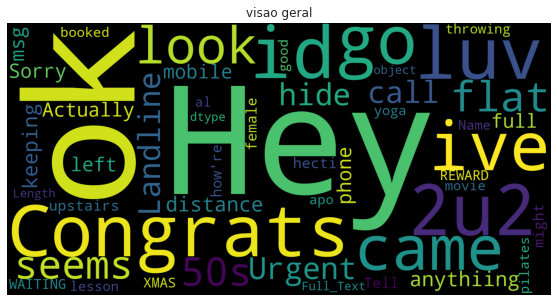

In [42]:
inicializa_dataset(dataset_path = 'sms_senior.csv')


print('\n \n Observa-se que existem inumeras contracoes e palavras sem significado com alta frequencia no texto')

* Para visualizar a matriz de palavras contadas


In [39]:
def visualiza_matriz_contagem(df):
    global count_words
    count_words = df.copy()
    count_words.drop(columns =['Full_Text','Common_Word_Count', 'Word_Count','Date', 'IsSpam'], inplace = True )
    count_words.to_csv('count_words.csv')
    return count_words.T

In [40]:
visualiza_matriz_contagem(df)

,0,1,2,3,4,5,6,7,8,9,...,5564,5565,5566,5567,5568,5569,5570,5571,5572,5573
got,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
great,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
wat,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
free,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
text,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wish,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
leave,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
thing,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
many,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### PRE PROCESSAMENTO

* Importando Bibliotecas para filtrar Stopwords em ingles

In [6]:
import nltk
from nltk.corpus import stopwords
stop_words= stopwords.words('english')

#stopwords adicionadas 
stop_words.append('yes')
stop_words.append('lol')
stop_words.append('plis')
stop_words.append('txt')
stop_words.append('dont')


In [7]:
import gensim
all_stopwords = gensim.parsing.preprocessing.STOPWORDS
print(all_stopwords)

frozenset({'everything', 'found', 'interest', 'anyway', 'was', 'same', 'whereas', 'unless', 'fire', 'him', 'sixty', 'meanwhile', 'himself', 'side', 'mill', 'done', 'amongst', 'five', 'per', 'she', 'doing', 'nowhere', 'get', 'is', 'herein', 'which', 'hence', 'anyhow', 'full', 'i', 'rather', 'under', 'without', 'show', 'each', 'for', 'anything', 'everyone', 'a', 'their', 'fifty', 'many', 'seems', 'through', 'one', 'from', 'least', 'now', 'themselves', 'thick', 'whence', 'though', 'may', 'two', 'whither', 'therein', 'km', 'well', 'had', 'or', 'empty', 'others', 'really', 'six', 'still', 'becoming', 'ours', 'find', 'either', 'co', 'will', 'her', 'sincere', 'again', 'on', 'never', 'no', 'been', 'when', 'out', 'any', 'ever', 'cannot', 'part', 'yourself', 'the', 'keep', 'all', 'were', 'enough', 'whom', 'our', 'ten', 'system', 'beyond', 'yet', 'somehow', 'than', 'while', 'three', 'due', 'four', 'since', 'across', 'these', 'indeed', 'name', 'nothing', 'about', 'however', 'top', 'bottom', 'more'

* Filtrando stopwords e realizando a soma da frequencia total de cada palavra

In [8]:
def pre_process_words(df):
    global total_sum_words 
    total_sum_words =[]
    words = []
    count_words = df
    for k in count_words.columns:
        if k not in stop_words:
            if k not in all_stopwords:
                total_sum_words.append([df[k].sum(), k]) #tokens and absolute frequency (sum of frequency)
                words.append(k) # only tokens
        else: print('StopWord', k)
    return print('\n Words into dataset: \n', words)


In [9]:
pre_process_words(count_words)

StopWord txt
StopWord dont
StopWord now
StopWord won
StopWord will
StopWord yes
StopWord can
StopWord just
StopWord lol

 Words into dataset: 
 ['got', 'great', 'wat', 'free', 'text', 'win', 'dun', 'think', 'hey', 'like', 'send', 'friends', 'claim', 'customer', 'prize', 'mobile', 'gonna', 'home', 'ive', 'soon', 'today', 'tonight', 'want', 'cash', 'reply', 'urgent', 'week', 'help', 'right', 'wont', 'message', 'next.', 'feel', 'thats', 'way', 'miss', 'going', 'try', 'lor', 'meet', 'getting', 'love', 'amp', 'ill', 'know', 'let', 'work', 'sure', 'wait', 'yeah', 'tell', 'thanks', 'msg', 'pls', 'need', 'nokia', 'tomorrow', 'hope', 'ltgt', 'didnt', 'ask', 'time', 'morning', 'place', 'happy', 'sorry', 'new', 'year', 'later', 'pick', 'good', 'come', 'nice', 'said', 'day', 'money', 'babe', 'waiting', 'stop', 'late', 'night', 'guaranteed', 'service', 'buy', 'box', 'youre', 'dear', 'life', 'people', 'cos', 'things', 'contact', 'went', 'sent', 'chat', 'gud', 'thk', 'coming', 'told', 'sleep', 'care'

In [10]:
print('\n Sum of total words into dataset: \n \n', total_sum_words)


 Sum of total words into dataset: 
 
 [[240, 'got'], [111, 'great'], [96, 'wat'], [278, 'free'], [189, 'text'], [73, 'win'], [55, 'dun'], [132, 'think'], [111, 'hey'], [244, 'like'], [191, 'send'], [58, 'friends'], [113, 'claim'], [58, 'customer'], [92, 'prize'], [139, 'mobile'], [58, 'gonna'], [162, 'home'], [75, 'ive'], [59, 'soon'], [141, 'today'], [60, 'tonight'], [193, 'want'], [74, 'cash'], [144, 'reply'], [65, 'urgent'], [116, 'week'], [59, 'help'], [92, 'right'], [56, 'wont'], [83, 'message'], [62, 'next.'], [62, 'feel'], [99, 'thats'], [101, 'way'], [79, 'miss'], [171, 'going'], [51, 'try'], [160, 'lor'], [78, 'meet'], [50, 'getting'], [200, 'love'], [84, 'amp'], [239, 'ill'], [257, 'know'], [70, 'let'], [100, 'work'], [71, 'sure'], [59, 'wait'], [86, 'yeah'], [137, 'tell'], [76, 'thanks'], [83, 'msg'], [109, 'pls'], [167, 'need'], [72, 'nokia'], [90, 'tomorrow'], [104, 'hope'], [276, 'ltgt'], [81, 'didnt'], [88, 'ask'], [208, 'time'], [77, 'morning'], [59, 'place'], [107, 'h

### Transforming `total_sum_words` into dataset `sum_labels`

In [11]:
import numpy as np

#cria dataframe com cada token (labels) e sua respectiva frequencia absoluta em todo o dataset
sum_labels = pd.DataFrame(np.array(total_sum_words), columns=['total_sum', 'labels'])

#transforma os dados em inteiros
sum_labels.total_sum = sum_labels.total_sum.astype('int')

#ordem decrescente
sum_labels.sort_values(by=['total_sum'], ascending = False)



,total_sum,labels
3,278,free
58,276,ltgt
44,257,know
9,244,like
0,240,got
...,...,...
101,50,mins
97,50,coming
96,50,thk
67,50,year


* Observa-se que as labels free, ltgt, know estao entre as mais citadas em todo o dataset. O proximo passo agora sera exibir graficamente o comportamento dessas palavras.

## Palavras mais frequentes do Dataset

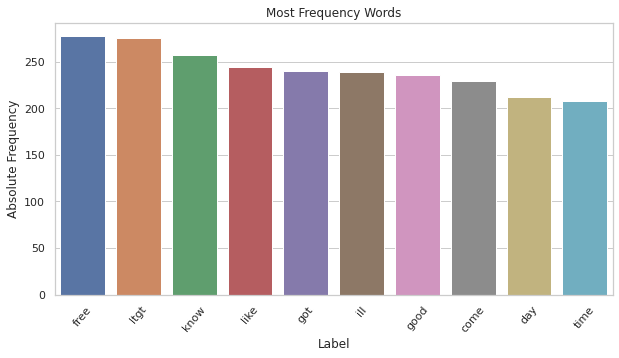

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
fig = sns.barplot(x="labels", y="total_sum", data=sum_labels.loc[sum_labels.total_sum>200].sort_values("total_sum", ascending=False))
plt.xticks(rotation=50)
plt.title('Most Frequency Words')
fig.set(xlabel="Label", ylabel = "Absolute Frequency")
plt.savefig('most_frequent_words.jpg')
plt.show(fig)


* Por meio do grafico, confirma-se a hipotese levantada, ou seja, as palavras free, ltgt, know estao entre as mais frequentes em todo o dataset. Agora, sera apresentado a frequencia de palavras por mes.

### 2. Exibir gráfico com as quantidades de mensagens comuns e spams para cada mês

* Convertendo em formato de data 

In [45]:
df["Date"] = pd.to_datetime(df["Date"], format='%Y-%m-%d %H:%M:%S')

#Separa a Data por ano
df['year'] = pd.to_datetime(df['Date']).dt.to_period('Y')

#Separa a data por ano e mes
df['month'] = pd.to_datetime(df['Date']).dt.to_period('M')

print('\n \n Datas e Valores unicos observados no dataset:\n \n',df.month.value_counts()) 


 
 Datas e Valores unicos observados no dataset:
 
 2017-01    1953
2017-03    1865
2017-02    1756
Freq: M, Name: month, dtype: int64


* Observa-se que o registro de mensagens ocorre nos meses de janeiro a marco de 2017

### Plotando as mensagens segundo cada mes

* Mensagens em Janeiro

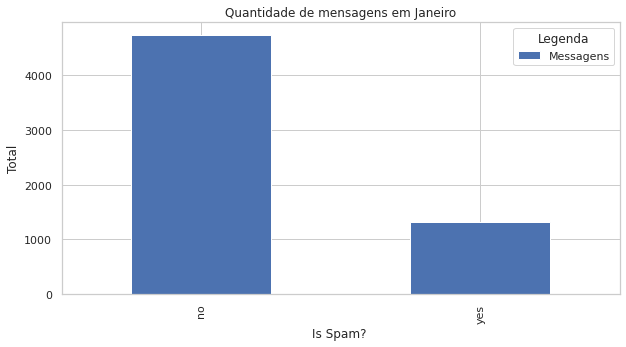


 

A quantidade de mensagens em Janeiro, é: 
 IsSpam
no     4729
yes    1320
Name: Common_Word_Count, dtype: int64

 



In [52]:
january = df.loc[df.month <'2017-02']

plt.figure(figsize=(10,5))
fig = january.groupby('IsSpam')['Common_Word_Count'].sum().plot.bar(grid = True)
plt.title('Quantidade de mensagens em Janeiro')
fig.legend(['Messagens'], title ='Legenda', loc='best') #colocando a legenda no melhor lugar
fig.set(xlabel="Is Spam? ", ylabel = "Total")
plt.savefig('january.jpg')
plt.show(fig)


print('\n \n')
print('A quantidade de mensagens em Janeiro, é: \n', january.groupby('IsSpam')['Common_Word_Count'].sum())
print('\n \n')
#janeiro

* Mensagens em Fevereiro

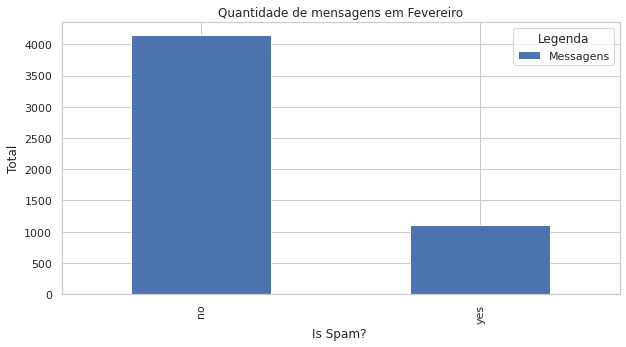


 

A quantidade de mensagens em Fevereiro, é: 
 IsSpam
no     4144
yes    1106
Name: Common_Word_Count, dtype: int64

 



In [53]:
february = df.loc[(df.month >'2017-01') & (df.month <'2017-03')]
plt.figure(figsize=(10,5))
fig = february.groupby('IsSpam')['Common_Word_Count'].sum().plot.bar(grid = True)
plt.title('Quantidade de mensagens em Fevereiro')
fig.legend(['Messagens'], title ='Legenda', loc='best') #colocando a legenda no melhor lugar
fig.set(xlabel="Is Spam? ", ylabel = "Total")
plt.savefig('febre.jpg')
plt.show(fig)


print('\n \n')
print('A quantidade de mensagens em Fevereiro, é: \n', february.groupby('IsSpam')['Common_Word_Count'].sum())
print('\n \n')

* Mensagens em Marco

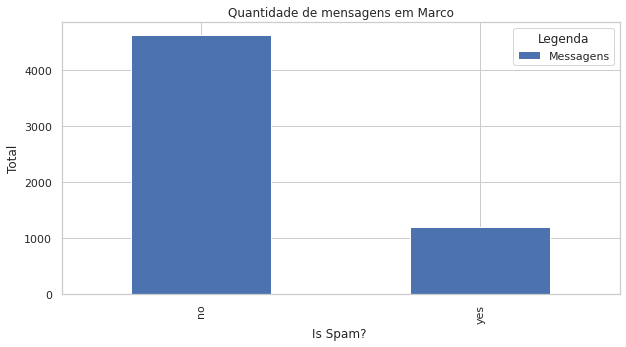

A quantidade de mensagens em Marco, é: 
 IsSpam
no     4623
yes    1194
Name: Common_Word_Count, dtype: int64

 



In [54]:
march = df.loc[df.month >'2017-02']

plt.figure(figsize=(10,5))
fig = march.groupby('IsSpam')['Common_Word_Count'].sum().plot.bar(grid = True)
plt.title('Quantidade de mensagens em Marco')
fig.legend(['Messagens'], title ='Legenda', loc='best') #colocando a legenda no melhor lugar
fig.set(xlabel="Is Spam? ", ylabel = "Total")
plt.savefig('march.jpg')
plt.show(fig)



print('A quantidade de mensagens em Marco, é: \n', march.groupby('IsSpam')['Common_Word_Count'].sum())
print('\n \n')

### 3. Calcular o máximo, o mínimo, a média, a mediana, o desvio padrão e a variância da quantidade total de palavras (Word_Count) para cada mês; 

* Maximo e Minimo da quantidade total de palavras

In [17]:
print('Maximo (Word_Count) :', df.Word_Count.max())
print('Minimo (Word_Count) :', df.Word_Count.min())

Maximo (Word_Count) : 190
Minimo (Word_Count) : 2


* A média é uma medida de tendência central que indica o valor onde estão concentrados os dados de um conjunto de valores, representando um valor significativo para o mesmo.

In [18]:
print('Mediana da quantidade total de palavras (Word_Count) :', df.Word_Count.mean())

Mediana da quantidade total de palavras (Word_Count) : 16.222640832436312


* A mediana é o valor que separa a metade superior da metade inferior de uma distribuição de dados, ou o valor no centro da distribuição. 

In [19]:
print('Media da quantidade total de palavras (Word_Count) :', df.Word_Count.median())

Media da quantidade total de palavras (Word_Count) : 13.0


* O desvio padrão também é uma medida de dispersão, que indica quanto os dados estão afastados da média. 

In [20]:
print('Desvio Padrao da quantidade total de palavras (Word_Count) :', df.Word_Count.std())

Desvio Padrao da quantidade total de palavras (Word_Count) : 11.767262023956693


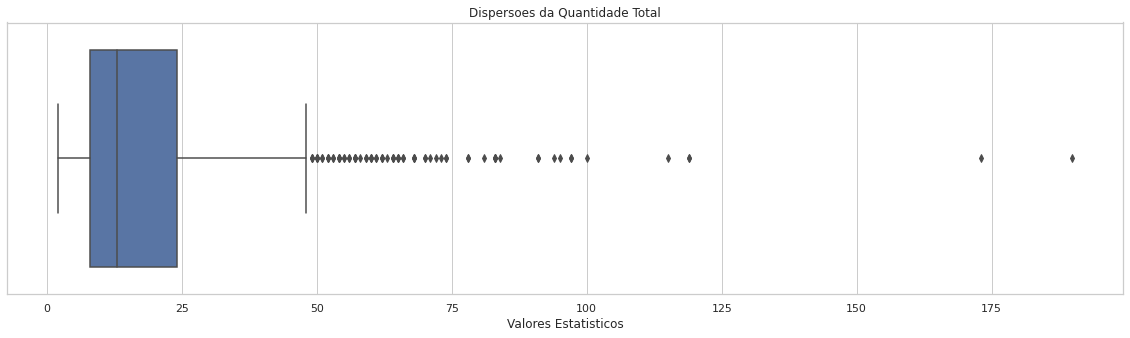

In [21]:
sns.set(style="whitegrid")

plt.figure(figsize=(20,5))

ax = sns.boxplot(x=df.Word_Count, data=df)
plt.title('Dispersoes da Quantidade Total')
ax.set(xlabel="Valores Estatisticos")
plt.show(ax)

* Separando por meses 

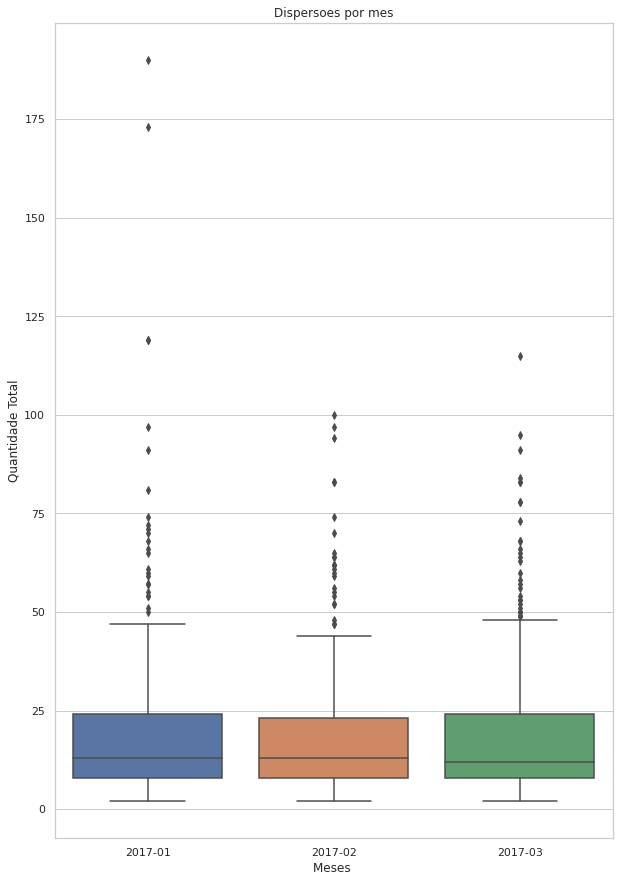

In [22]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,15))
ax = sns.boxplot(x=df.month,  y=df.Word_Count, data=df)
plt.title('Dispersoes por mes')
ax.set(xlabel="Meses ", ylabel = "Quantidade Total")
plt.show(ax)

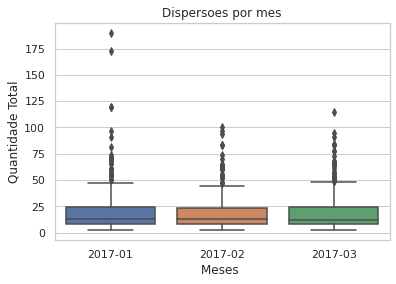

In [23]:
sns.set(style="whitegrid")


ax = sns.boxplot(x=df.month,  y=df.Word_Count, data=df)
plt.title('Dispersoes por mes')
ax.set(xlabel="Meses ", ylabel = "Quantidade Total")
plt.show(ax)

* Outra opcao para analise estatistica

In [24]:
df.describe()

,got,great,wat,free,text,txt,win,already,dun,say,...,mins,phone,number,wish,leave,thing,many,wan,Common_Word_Count,Word_Count
count,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,...,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000
mean,0.043057,0.019914,0.017223,0.049874,0.033907,0.029243,0.013097,0.016146,0.009867,0.016505,...,0.008970,0.022605,0.016864,0.009329,0.009867,0.010944,0.010585,0.010226,3.070685,16.222641
std,0.212504,0.150833,0.135517,0.264584,0.198953,0.178834,0.119845,0.128865,0.105864,0.132933,...,0.094294,0.151049,0.136879,0.106756,0.102418,0.104047,0.110766,0.102382,2.660399,11.767262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,13.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000
max,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000,2.000000,2.000000,38.000000,190.000000


### 4. Exibir o dia de cada mês que possui a maior sequência de mensagens comuns (não spam).  

In [25]:
df_IsSpam = df.loc[df.IsSpam=='yes']
df_IsSpam.sort_values(by='Common_Word_Count', ascending = False)

,Full_Text,got,great,wat,free,text,txt,win,already,dun,...,wish,leave,thing,many,wan,Common_Word_Count,Word_Count,Date,IsSpam,month
4943,Get ur 1st RINGTONE FREE NOW! Reply to this ms...,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,12,33,2017-03-21 05:51:00,yes,2017-03
925,Do you want a New Nokia 3510i Colour Phone Del...,0,0,0,3,1,0,0,0,0,...,0,0,0,0,0,12,27,2017-01-15 10:10:00,yes,2017-01
2919,Do you want a New Nokia 3510i Colour Phone Del...,0,0,0,3,1,0,0,0,0,...,0,0,0,0,0,12,27,2017-02-16 08:40:00,yes,2017-02
575,Hey Boys. Want hot XXX pics sent direct 2 ur p...,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,11,29,2017-01-09 18:47:00,yes,2017-01
5404,No. 1 Nokia Tone 4 ur mob every week! Just txt...,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,11,31,2017-03-28 17:00:00,yes,2017-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4299,PRIVATE! Your 2003 Account Statement for 078,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,7,2017-03-10 16:09:00,yes,2017-03
3619,Update_Now - 12Mths Half Price Orange line ren...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,16,2017-02-27 11:02:00,yes,2017-02
644,2/2 146tf150p,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,2017-01-10 22:08:00,yes,2017-01
4544,RECPT 1/3. You have ordered a Ringtone. Your o...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,13,2017-03-14 16:10:00,yes,2017-03


* Calculando a porcentagem de palavras repetidas sobre o total de palavras de cada mensagem

In [26]:
df['perc_common_words'] = 0
for k in range(len(df_IsSpam)):
    df['perc_common_words'] = (df['Common_Word_Count'][k] / df['Word_Count'][k])*100

* Localizando o valor maximo percentual 

In [27]:
df.loc[df['Common_Word_Count'] == df['Common_Word_Count'].max()]

,Full_Text,got,great,wat,free,text,txt,win,already,dun,...,leave,thing,many,wan,Common_Word_Count,Word_Count,Date,IsSpam,month,perc_common_words
1123,For me the love should start with attraction.i...,0,0,0,0,0,0,0,0,0,...,0,1,0,0,38,190,2017-01-18 13:17:00,no,2017-01,11.111111


### Portanto, 

In [28]:
print('A maior quantidade de palavras repetidas representa', round(df['perc_common_words'].max(),2), '.','\n\n'
      'e corresponde a mensagem: \n\n', df['Full_Text'][1123], '\n\nenviada no dia', df['Date'][1123].day,'.' )

A maior quantidade de palavras repetidas representa 11.11 . 

e corresponde a mensagem: 

 For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.

------------------

# Parte 2

A segunda etapa consiste em aplicar um método capaz de classificar automaticamente as mensagens
como “comum” e “spam”. Como você considera os resultados encontrados? Justifique.

* Dropando colunas nao-necessarias para o modelo de machine learning

In [29]:
df.drop(columns = ['Date', 'month', 'perc_common_words', 'Common_Word_Count','Word_Count'], inplace = True)

* Transformando o tipo de dados do dataset

In [30]:
features = df.iloc[:,1:149].astype('int')
df['IsSpam'] = df.iloc[:,150].astype('category')


* Transformando os dados categoricos do dataset

In [55]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()# Assigning numerical values and storing in another column

df['label_encoding'] = labelencoder.fit_transform(df['IsSpam']) #salva os dados categoticos no dataframe
df

,Full_Text,got,great,wat,free,text,txt,win,already,dun,...,leave,thing,many,wan,Common_Word_Count,Word_Count,Date,IsSpam,month,label_encoding
0,Hey! Congrats 2u2. id luv 2 but ive had 2 go h...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,12,2017-01-01 00:08:00,no,2017-01,0
1,"came to look at the flat, seems ok, in his 50s...",1,0,0,0,0,0,0,0,0,...,0,0,0,0,3,23,2017-01-01 00:19:00,no,2017-01,0
2,Urgent! call 09061749602 from Landline. Your c...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4,25,2017-01-01 01:53:00,yes,2017-01,1
3,Do you hide anythiing or keeping distance from me,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,9,2017-01-01 02:14:00,no,2017-01,0
4,"Actually, my mobile is full of msg. And i m do...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,9,29,2017-01-01 02:25:00,no,2017-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5569,"Sorry, left phone upstairs. OK, might be hecti...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,22,2017-03-31 21:13:00,no,2017-03,0
5570,Tell me they're female :V how're you throwing ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,19,2017-03-31 22:19:00,no,2017-03,0
5571,A £400 XMAS REWARD IS WAITING FOR YOU! Our com...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4,27,2017-03-31 23:15:00,yes,2017-03,1
5572,Hey i've booked the pilates and yoga lesson al...,0,0,0,0,0,0,0,1,0,...,0,0,0,0,3,11,2017-03-31 23:32:00,no,2017-03,0


* Observando o balanceamento entre as classes

In [32]:
target = df['label_encoding'] 
target.value_counts()


0    4827
1     747
Name: label_encoding, dtype: int64

Nota-se que a distribuicao esta desigual. Os metodos DownSampling e UpSampling serao aplicados caso o modelo ML nao apresente desempenho desejavel

* Dispersao dos dados para as features

In [33]:
features.describe()

,got,great,wat,free,text,txt,win,already,dun,say,...,told,sleep,care,mins,phone,number,wish,leave,thing,many
count,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,...,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000
mean,0.043057,0.019914,0.017223,0.049874,0.033907,0.029243,0.013097,0.016146,0.009867,0.016505,...,0.009508,0.010047,0.012199,0.008970,0.022605,0.016864,0.009329,0.009867,0.010944,0.010585
std,0.212504,0.150833,0.135517,0.264584,0.198953,0.178834,0.119845,0.128865,0.105864,0.132933,...,0.098887,0.104996,0.109785,0.094294,0.151049,0.136879,0.106756,0.102418,0.104047,0.110766
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000,2.000000


# Classificadores de mensagem Spam

* Bibliotecas necessarias

In [34]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from  sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

/home/bruna/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


* Algoritmos de classificacao

In [35]:
def classificador(features, target):
    # Divisao do conjunto 70% treino e 30% teste  
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3) 
    
    naive = MultinomialNB()
    log_regress = LogisticRegression()
    arvore_decision = DecisionTreeClassifier()
    
    classificadores = [naive, log_regress, arvore_decision]
    
    for classificador in classificadores:
       
        #classification
        classificador.fit(X_train, y_train)
        y_pred = classificador.predict(X_test)

        #metrics
        classification_report(y_test,y_pred)
        accuracy_score(y_test,y_pred)
        confusion_matrix(y_test,y_pred)
   
        print('\n classificador:', classificador, '\n metricas:', classification_report(y_test,y_pred), '\n \n Teste de acuracia: \n', accuracy_score(y_test,y_pred), '\n \n Matriz de Confusao: \n',confusion_matrix(y_test,y_pred), '\n \n \n -------------------------------------------------------------' )

In [36]:
classificador(features, target)


 classificador: MultinomialNB() 
 metricas:               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1447
           1       0.92      0.80      0.86       226

    accuracy                           0.96      1673
   macro avg       0.95      0.89      0.92      1673
weighted avg       0.96      0.96      0.96      1673
 
 
 Teste de acuracia: 
 0.9635385534967125 
 
 Matriz de Confusao: 
 [[1432   15]
 [  46  180]] 
 
 
 -------------------------------------------------------------

 classificador: LogisticRegression() 
 metricas:               precision    recall  f1-score   support

           0       0.96      0.99      0.98      1447
           1       0.95      0.76      0.84       226

    accuracy                           0.96      1673
   macro avg       0.95      0.88      0.91      1673
weighted avg       0.96      0.96      0.96      1673
 
 
 Teste de acuracia: 
 0.9617453676031081 
 
 Matriz de Confusao: 
 [[1437   10]
 [ 

/home/bruna/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
